Autosomal raw data is formatted according to the Genome Reference Consortium Build 37 (GRCh37) structure for SNP positions. Because of the nature of autosomal DNA, X-chromosome data is sometimes not used for particular research purposes. For this reason, Build 37 raw data is available in three formats:

    Build 37 Autosomal Raw data - This includes all autosomal SNPs except those found on the X chromosome.
    Build 37 X Chromosome Raw data - This includes only autosomal SNPs found on the X chromosome.
    Build 37 Concatenated Raw data - This includes all autosomal SNPs including those found on the X chromosome.


    RSID – Displays the RS number for the SNP in the NIH dbSNP database.
    Chromosome – Displays the name of the chromosome where the SNP is located. For an autosomal file, that is 1 through 22. For an X-chromosome file, that is X.
    Position – Displays the specific location on the specified chromosome of the SNP.
    Result – Displays the allele values for the SNP.

These tables show the possible values for the Result column and their meanings. We report results according to each microarray chip maker’s specifications.

In [17]:
alleles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mygenome/alleledescription.csv')
alleles

,result,allele_value,meaning,allele_description
0,DD,"deletion, deletion",Two copies of a deletion,homozygous
1,II,"insertion, insertion",Two copies of an insertion,homozygous
2,DI,"deletion, insertion","One copy of a deletion, one copy of an insertion",heterozygous
3,AA,"adenine, adenine",two copies of adenine,homozygous
4,CC,"cytosine, cytosine",two copies of cytosine,homozygous
5,GG,"guanine, guanine",two copies of guanine,homozygous
6,TT,"thymine, thymine",two copies of thymine,homozygous
7,CT,"cytosine, thymine","One cytosine copy, one thymine copy",heterozygous
8,TC,"thymine, cytosine","One thymine copy, one cytosine copy",heterozygous
9,AG,"adenine, adenine",two adenine copies,homozygous


In [18]:
!pip install ydata-profiling
import numpy as np
import gzip
import csv
import json
import pandas as pd
from ydata_profiling import ProfileReport

df_concat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mygenome/cchrom.gz', compression='gzip')
df_concat




<ipython-input-18-1ec089adc053>:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_concat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mygenome/cchrom.gz', compression='gzip')


,RSID,CHROMOSOME,POSITION,RESULT
0,2010-08-Y-1221,0,0,--
1,2010-08-Y-1364,0,0,--
2,2010-08-Y-1995,0,0,--
3,2010-08-Y-2045,0,0,--
4,2010-08-Y-3042,0,0,--
...,...,...,...,...
613798,200610-146,MT,16217,--
613799,15SNP16318FA_T,MT,16318,--
613800,MitoC16329T,MT,16327,--
613801,MitoG16393A,MT,16391,--


In [2]:
#Result provides genotype description
df_xchrom = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mygenome/xchrom.gz', compression='gzip')
df_xchrom.head()

,RSID,CHROMOSOME,POSITION,RESULT
0,rs60233760,X,2699898,--
1,rs2306737,X,2699968,AA
2,rs5939319,X,2700157,GG
3,rs143003919,X,2700163,-G
4,rs5939320,X,2700202,AA


In [4]:
Genome = ProfileReport(df_concat, title='Dataset-description')
Genome.to_file('/content/drive/MyDrive/Colab Notebooks/mygenome')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:360: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df_autosomal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mygenome/37autosomal.gz', compression='gzip', low_memory=False)
df_autosomal.head()

,RSID,CHROMOSOME,POSITION,RESULT
0,2010-08-Y-1221,0,0,--
1,2010-08-Y-1364,0,0,--
2,2010-08-Y-1995,0,0,--
3,2010-08-Y-2045,0,0,--
4,2010-08-Y-3042,0,0,--


In [5]:


df_concat.RESULT.value_counts().to_frame().rename(columns={0:"Unique Values"}).style.background_gradient(cmap="plasma")




,RESULT
CC,143342
GG,142877
AA,104966
TT,104920
CT,42840
AG,42703
--,11475
AC,10174
GT,9940
CG,346


In [6]:
pd.isnull(df_concat).sum().to_frame().rename(columns={0:"Missing Values"}).style.background_gradient(cmap="plasma")

,Missing Values
RSID,0
CHROMOSOME,0
POSITION,0
RESULT,0


In [8]:
df_anomaly = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mygenome/snpedia.csv')
df_anomaly.head()

,Unnamed: 0,Magnitude,Repute,Summary
0,Rs661(A;A),9.0,Bad,early onset Alzheimer's disease
1,Rs6647(T;T),0.0,Good,Normal; two copies of Pi-M1V allele
2,Rs6647(C;C),0.0,Good,Normal; two copies of Pi-M1A allele
3,Rs1303(T;T),0.0,Good,common in clinvar
4,Rs28929471(G;G),0.0,Good,common in complete genomics


In [9]:
pd.isnull(df_anomaly).sum().to_frame().rename(columns={0:"Missing Values"}).style.background_gradient(cmap="plasma")

,Missing Values
Unnamed: 0,0
Magnitude,0
Repute,9
Summary,4


In [10]:
df_anomaly = df_anomaly[df_anomaly['Repute'].notna()]

In [11]:
df_anomaly.head()

,Unnamed: 0,Magnitude,Repute,Summary
0,Rs661(A;A),9.0,Bad,early onset Alzheimer's disease
1,Rs6647(T;T),0.0,Good,Normal; two copies of Pi-M1V allele
2,Rs6647(C;C),0.0,Good,Normal; two copies of Pi-M1A allele
3,Rs1303(T;T),0.0,Good,common in clinvar
4,Rs28929471(G;G),0.0,Good,common in complete genomics


In [15]:
df_anomaly.rename(columns={'Unnamed: 0' : 'RSID', 'Repute' : 'Quality'}, inplace=True)
df_anomaly

,RSID,Magnitude,Quality,Summary,Genotype
0,rs661,9.0,Bad,early onset Alzheimer's disease,A;A
1,rs6647,0.0,Good,Normal; two copies of Pi-M1V allele,T;T
2,rs6647,0.0,Good,Normal; two copies of Pi-M1A allele,C;C
3,rs1303,0.0,Good,common in clinvar,T;T
4,rs28929471,0.0,Good,common in complete genomics,G;G
...,...,...,...,...,...
95,rs6166,1.0,Bad,Females slightly more likely to be sterile,G;G
96,rs6166,0.0,Good,common/normal,A;A
97,rs28928870,0.0,Good,common in clinvar,C;C
98,rs28928871,0.0,Good,common in clinvar,G;G


In [13]:
df_anomaly['Genotype'] = df_anomaly['RSID'].str.extract('.*\((.*)\).*')
df_anomaly['Genotype'] = df_anomaly['Genotype'].str.replace(' ; ', "")
df_anomaly["RSID"] = df_anomaly["RSID"].str.replace('\((.*)\)', "")
df_anomaly['RSID'] = df_anomaly['RSID'].str.lower()
df_anomaly.head(5)


<ipython-input-13-38aa81fdffa9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_anomaly["RSID"] = df_anomaly["RSID"].str.replace('\((.*)\)', "")


,RSID,Magnitude,Quality,Summary,Genotype
0,rs661,9.0,Bad,early onset Alzheimer's disease,A;A
1,rs6647,0.0,Good,Normal; two copies of Pi-M1V allele,T;T
2,rs6647,0.0,Good,Normal; two copies of Pi-M1A allele,C;C
3,rs1303,0.0,Good,common in clinvar,T;T
4,rs28929471,0.0,Good,common in complete genomics,G;G


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Magnitude'].plot(kind='hist', bins=20, title='Magnitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('RSID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Genotype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='Magnitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Magnitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RSID')):
  _plot_series(series, series_name, i)
  fig.legend(title='RSID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Magnitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Magnitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Quality')):
  _plot_series(series, series_name, i)
  fig.legend(title='Quality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Magnitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Magnitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Summary')):
  _plot_series(series, series_name, i)
  fig.legend(title='Summary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Magnitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Magnitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genotype')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genotype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Magnitude')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Magnitude'].plot(kind='line', figsize=(8, 4), title='Magnitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Quality'].value_counts()
    for x_label, grp in _df_13.groupby('RSID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RSID')
_ = plt.ylabel('Quality')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Summary'].value_counts()
    for x_label, grp in _df_14.groupby('Quality')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Quality')
_ = plt.ylabel('Summary')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genotype'].value_counts()
    for x_label, grp in _df_15.groupby('Summary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Summary')
_ = plt.ylabel('Genotype')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['RSID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='RSID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Quality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Quality', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Summary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='Summary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Genotype'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='Genotype', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import holoviews as hv
hv.extension('bokeh')


In [14]:
df_anomaly['Genotype'].value_counts().to_frame().rename(columns={0:"Unique Values"}).style.background_gradient(cmap="plasma")

,Genotype
G;G,32
A;A,20
C;C,20
T;T,19


In [58]:
chromosome_ref = df_concat.groupby("CHROMOSOME")["CHROMOSOME"].count()
chromosome_ref.to_frame().rename(columns={"CHROMOSOME":"Count"}).style.background_gradient(cmap="plasma")
chromosome_ref = chromosome_ref.sort_values(ascending=True)
chromosome_ref

CHROMOSOME
MT      179
XY      571
0       781
21     8169
16     8701
22     9041
16    10253
19    13890
20    14156
18    16512
15    17812
14    17973
17    18296
13    20141
9     23067
12    27810
10    32382
11    32951
8     33225
7     37044
5     39947
4     41182
3     45408
6     46107
1     48861
2     49344
Name: CHROMOSOME, dtype: int64

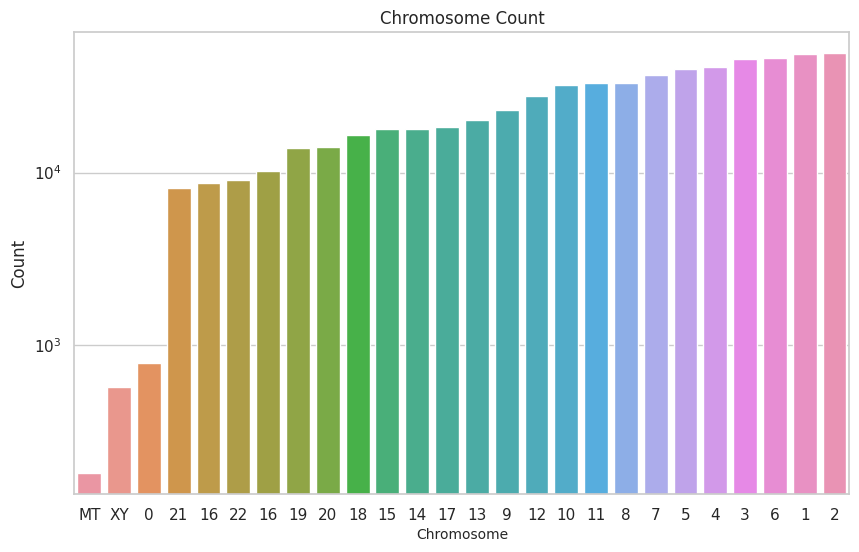

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot( x=chromosome_ref.index, y=chromosome_ref.values)

plt.xlabel("Chromosome", fontsize=10)
plt.ylabel("Count")
plt.title("Chromosome Count")
#MT chromosome will not appear as a bar using count so a logrithmic approach will allow it to be seen
plt.yscale('log')
plt.show()
